# Programacion Dinamica Grafos



In [1]:
class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
    
    def adjacency_list(self):
        pass

    
class weighted_digraph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges.keys()} | {v for u,v in self.edges.keys()}    
    
    def adjacency_list(self):
        adjacent=lambda n : [v for u,v in self.edges.keys() if u==n]
        return {v:adjacent(v) for v in self.nodes}

In [3]:
from heapq import heappush,heappop
import numpy as np

def dijkstra(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={v:float('inf') for v in G.nodes}
    distance.update({start:0})
    frontier=[]
    heappush(frontier,(0,start))
    while frontier:
        dist_u,u=heappop(frontier)
        for v in neighbors[u]:
            dist_v=dist_u+G.edges[(u,v)]
            if dist_v<distance[v]:
                path.update({v:u})
                distance.update({v:dist_v})
                heappush(frontier,(dist_v,v))
    return path,distance

def bellman_ford(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={v:float('inf') for v in G.nodes}
    distance.update({start:0})
    for i in range(len(G.nodes)-1):
        for (u,v) in G.edges.keys():
            dist_v=distance[u]+G.edges[(u,v)]
            if dist_v<distance[v]:
                path.update({v:u})
                distance.update({v:dist_v})
    return path,distance

def shortest_path(parent,end):
    path=[end]
    k=end
    while k is not None:
        path.append(parent[k])
        k=parent[k]
    return path[:-1][::-1]

In [4]:
random_graph = lambda n,p : {(u,v):np.random.randint(1,10) for u in np.arange(n) for v 
                    in np.arange(n) if np.random.rand()>p and u!=v}
# cantidad de vértices
n=10
# 1- probabilidad de crear aristas
p=0.5

E=random_graph(n,p)

G=weighted_digraph(E)
# chequear que el grafo sea conexo y que el vértice inicial exista!

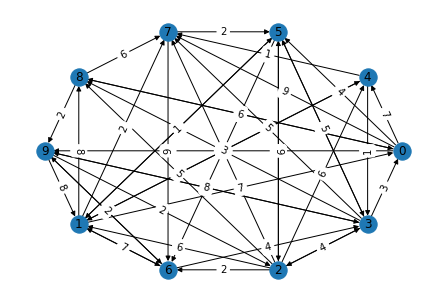

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G_nx=nx.DiGraph()
G_nx.add_weighted_edges_from([(u,v,w) for ((u,v),w) in E.items()])
pos = nx.circular_layout(G_nx)  # positions for all nodes
nx.draw(G_nx,with_labels=True,pos=pos)
labels = nx.get_edge_attributes(G_nx,'weight')
nx.draw_networkx_edge_labels(G_nx,pos,edge_labels=labels)

plt.show()

In [6]:
start=0
path,distance=dijkstra(G,start)
distance

{0: 0, 1: 8, 2: 8, 3: 8, 4: 7, 5: 4, 6: 10, 7: 8, 8: 7, 9: 6}

In [7]:
path,distance=bellman_ford(G,start)
distance

{0: 0, 1: 8, 2: 8, 3: 8, 4: 7, 5: 4, 6: 10, 7: 8, 8: 7, 9: 6}

In [8]:
length, path = nx.single_source_dijkstra(G_nx, 0,weight='weight')
length

{0: 0, 1: 8, 2: 8, 3: 8, 4: 7, 5: 4, 6: 10, 7: 8, 8: 7, 9: 6}

In [11]:
import time

n=100
# 1- probabilidad de crear aristas
p=0.3

E=random_graph(n,p)
G=weighted_digraph(E)

t1=time.time()
p,d=dijkstra(G,0)
t2=time.time()
print('Dijkstra Tiempo : {0:0.5f}'.format(t2-t1))

t3=time.time()
p,d=bellman_ford(G,0)
t4=time.time()
print('Bellman Ford Tiempo : {0:0.5f}'.format(t4-t3))

Dijkstra Tiempo : 0.06158
Bellman Ford Tiempo : 0.24637


# Tarea

En esta tarea Ud. debe comprobar las siguientes hipótesis:

    1.) La complejidad del algoritmo Dijsktra depende de la cantidad de aristas del grafo.
    2.) El peor caso del algoritmo Bellman-Ford se produce cuando el grafo es denso (gran cantidad de aristas).
    3.) Cuando se requiere calcular las distancias más cortas entre todos los vértices del grafo, independiente de la cantidad de vértices el algoritmo Floyd-Warshall mejora el tiempo de ejecución de la fuerza bruta.

In [13]:
import time

n=100
# 1- probabilidad de crear aristas
p=0.3

E=random_graph(n,p)
G=weighted_digraph(E)

t1=time.time()
p,d=dijkstra(G,0)
t2=time.time()
print('Dijkstra Tiempo : {0:0.5f}'.format(t2-t1))

t3=time.time()
p,d=bellman_ford(G,0)
t4=time.time()
print('Bellman Ford Tiempo : {0:0.5f}'.format(t4-t3))

Dijkstra Tiempo : 0.04703
Bellman Ford Tiempo : 0.25062


In [14]:
import numpy as np
import time
import pandas as pd

def run_experiment(n,method,p=0.5,n_samp=10):
    ellapsed_time={m:[] for m in method}
    s_n=[]
    p_n=[]
    for n in n:
      for prob in p:
        for j in range(n_samp):
            s_n.append(n)
            p_n.append(prob)
            E=random_graph(n,prob)
            G=weighted_digraph(E)
            for m in method:
                start=time.time()
                eval(m+"(G,0)")
                end=time.time()
                ellapsed_time[m].append(end-start)
    df_list=[]
    for m in method:
      j=len(ellapsed_time[m])
      df=pd.DataFrame({'n':s_n,'time':ellapsed_time[m],'method':[m]*j,'p':p_n})
      df_list.append(df)
    df_average=pd.concat(df_list,axis=0)
    return df_average

In [15]:
method=['dijkstra','bellman_ford']

n=[100,200,300]
p=[0.3,0.5,0.9]

df=run_experiment(n,method,p,n_samp=10)

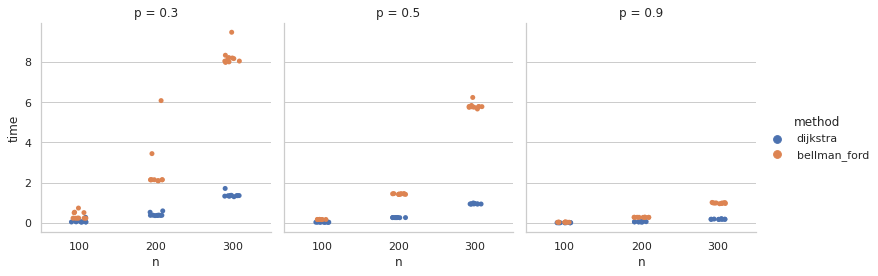

In [18]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

sns.catplot(x="n", y="time",hue="method", col="p",height=4, aspect=.9, data=df)
plt.show()

In [21]:
df1=df[df['method']=='dijkstra']
df2=df[df['method']=='bellman_ford']

df.groupby(['p','n','method']).mean()

time
p   n   method                
0.3 100 bellman_ford  0.369881
        dijkstra      0.081009
    200 bellman_ford  2.659026
        dijkstra      0.413424
    300 bellman_ford  8.262203
        dijkstra      1.383021
0.5 100 bellman_ford  0.169214
        dijkstra      0.034153
    200 bellman_ford  1.436211
        dijkstra      0.265401
    300 bellman_ford  5.814094
        dijkstra      0.949996
0.9 100 bellman_ford  0.034763
        dijkstra      0.007900
    200 bellman_ford  0.278062
        dijkstra      0.053236
    300 bellman_ford  0.986914
        dijkstra      0.184171

In [45]:
from scipy.stats import ttest_ind
# If test statistic < critical value: Fail to reject the null hypothesis.
# If test statistic >= critical value: Reject the null hypothesis.

for n in df['n'].unique():
  for p in df['p'].unique():
    cat1=df[(df['p']==p) & (df['n']==n) & (df['method']=='bellman_ford')]
    cat2=df[(df['p']==p) & (df['n']==n) & (df['method']=='dijkstra')]
    p_val=ttest_ind(cat1['time'], cat2['time'])[1]
    alpha = 0.05
    print('n : {0}, p : {1}, p-value : {2:.4f}'.format(n,p,p_val))
    if p_val > alpha:
	    print('Same distributions (fail to reject H0)')
    else:
	    print('Different distributions (reject H0)')
    print('------------------------------')
    

n : 100, p : 0.3, p-value : 0.0002
Different distributions (reject H0)
------------------------------
n : 100, p : 0.5, p-value : 0.0000
Different distributions (reject H0)
------------------------------
n : 100, p : 0.9, p-value : 0.0000
Different distributions (reject H0)
------------------------------
n : 200, p : 0.3, p-value : 0.0000
Different distributions (reject H0)
------------------------------
n : 200, p : 0.5, p-value : 0.0000
Different distributions (reject H0)
------------------------------
n : 200, p : 0.9, p-value : 0.0000
Different distributions (reject H0)
------------------------------
n : 300, p : 0.3, p-value : 0.0000
Different distributions (reject H0)
------------------------------
n : 300, p : 0.5, p-value : 0.0000
Different distributions (reject H0)
------------------------------
n : 300, p : 0.9, p-value : 0.0000
Different distributions (reject H0)
------------------------------
